<a href="https://colab.research.google.com/github/Virgel24-7/deeplearn/blob/main/cifarClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coarse Class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Fine Class for all: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Total images with 4 coarse label (fruits and vetegables) from TRAINING DATASET: 2500
Shape of the image training dataset: (2500, 32, 32, 3)
Fine Class for the extracted training images: [ 0 51 53 57 83]
Total images with 4 coarse label (fruits and vetegables) from TESTING DATASET: 500
Shape of the image testing dataset: (500, 32, 32, 3)
Fine Class for the extracted testing images: [ 0 51 53 57 83]


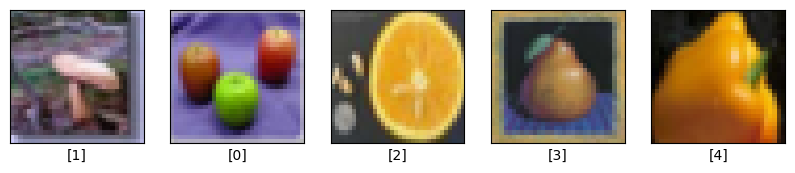

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

import numpy as np
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd

# ================ DATA PREPARATION STAGE ========================== #

# 1.) Load training and testing images in "coarse" label. "coarse" label means "types of object" (e.g., fruits, vegetable, etc.)
(a, coarse_TrLabels), (b,coarse_TsLabels) = keras.datasets.cifar100.load_data(label_mode='coarse') # Tr: Training; Ts: Testing
print('Coarse Class: {}'.format(np.unique(coarse_TrLabels)))

# 2.) Load training and testing image in "fine" label. "fine" labels refers to "name of object" (e.g., apple, carrots, etc.)
(fine_train, fine_Trlabels), (fine_test, fine_TsLabels) = keras.datasets.cifar100.load_data(label_mode='fine')
print('Fine Class for all: {}'.format(np.unique(fine_Trlabels)))

# 3.) Extract all images of a specific coarse class from the TRAINING DATASET
#     The "4" below is the assigned coarse class to "fruits and vegetables" images.
idx = []  # index holder
for i in range(len(coarse_TrLabels)):
  if coarse_TrLabels[i] == 4: # checks the coarse label of each sample in the training dataset
	  idx.append(i)  # append the index of an input image with "fruits and vegetables" coarse label.

print('Total images with 4 coarse label (fruits and vetegables) from TRAINING DATASET: {}'.format(len(idx)))
idx = np.array(idx)

# 4.) Extract all image and corresponding "fine" label and store in train_images, train_labels variable list.
train_images, train_labels = fine_train[idx], fine_Trlabels[idx]
print("Shape of the image training dataset: {}".format(train_images.shape))
uniq_fineClass = np.unique(train_labels)
print('Fine Class for the extracted training images: {}'.format(uniq_fineClass))

# 5.) Extract all images of a specific coarse class from the TESTING DATASET
#     The "4" below is the assigned coarse class to "fruits and vegetables" images.
idx = []
for i in range(len(coarse_TsLabels)):
	if coarse_TsLabels[i] == 4:
		idx.append(i)

print('Total images with 4 coarse label (fruits and vetegables) from TESTING DATASET: {}'.format(len(idx)))
idx = np.array(idx)

# 6.) Extract all image and corresponding "fine" label and store in test_images, test_labels variable list.
test_images, test_labels = fine_test[idx], fine_TsLabels[idx]
print("Shape of the image testing dataset: {}".format(test_images.shape))
uniq_fineClass = np.unique(test_labels)
print('Fine Class for the extracted testing images: {}'.format(uniq_fineClass))

# 7.) Relabel training and testing dataset to start from zero (0).
for i in range(len(uniq_fineClass)):
  for j in range(len(train_labels)):
    if train_labels[j] == uniq_fineClass[i]:
      train_labels[j] = i

  for j in range(len(test_labels)):
    if test_labels[j] == uniq_fineClass[i]:
      test_labels[j] = i

# Plot few samples from images from the TESTING DATASET
plt.figure(figsize=(10,2))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(test_labels[i])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 7200)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               921728    
                                                                 
 dense_11 (Dense)            (None, 5)                 645       
                                                                 
Total params: 923269 (3.52 MB)
Trainable params: 923269 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

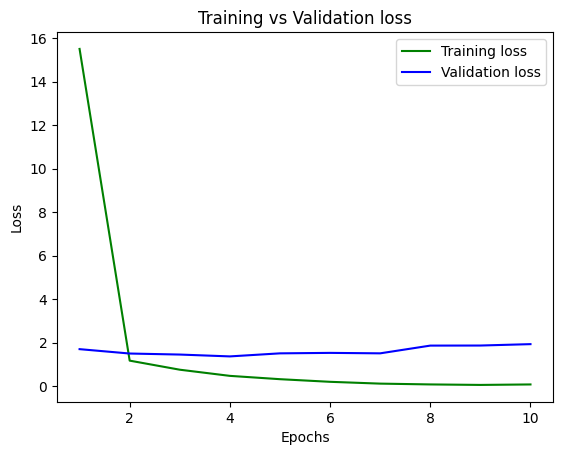

In [ ]:
# Build the model
model = tf.keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(len(uniq_fineClass), activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

metricInfo = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

loss = metricInfo.history['loss']
val_loss = metricInfo.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, 'g-', label="Training loss")
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test the model
str_class = ['apple', 'mushroom', 'orange', 'pear', 'bell pepper']

print(test_images.shape)
print("Class in the testing image: {}".format(np.unique(test_labels)))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Total number of testing image: {}'.format(len(test_images)))
print('Test accuracy:', test_acc)

# Another way to test using "prediction" method
classification = model.predict(test_images)
print('\nDisplaying prediction of the first test input image: {}'.format(classification[0]))

# get the index of the maximum probability in the classification[0] result
max_prob_idx = np.argmax(classification[0])
print('Predicted class: {}--{}'.format(max_prob_idx, str_class[max_prob_idx]))
idx = test_labels[0]
print('True class: {} -- {}'.format(idx[0], str_class[idx[0]]))

(500, 32, 32, 3)
Class in the testing image: [0 1 2 3 4]
16/16 [==============================] - 0s 8ms/step - loss: 2.1141 - sparse_categorical_accuracy: 0.6000
Total number of testing image: 500
Test accuracy: 0.6000000238418579
16/16 [==============================] - 0s 8ms/step

Displaying prediction of the first test input image: [5.3132964e-05 9.9908233e-01 1.2897637e-07 8.0564938e-04 5.8796006e-05]
Predicted class: 1--mushroom
True class: 1 -- mushroom
